In [126]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df=pd.read_json('data.json',orient='split')

In [8]:
df.shape

(50000, 10)

In [9]:
df.head()

,age,amount,category,client_time,device,event_name,gender,location,marital_status,session_id
0,18-24,NaN,Sports,2014-03-01 00:00:04,android,View Project,M,"{'state': 'CO', 'longitude': -105.35528, 'zip_...",married,69f62d2ae87640f5a2dde2b2e9229fe6
1,18-24,NaN,Technology,2014-03-01 00:00:22,iOS,View Project,M,"{'state': 'GA', 'longitude': -84.47405, 'zip_c...",single,4459d001feb8438eae5f4ec24abcd992
2,55+,NaN,Environment,2014-03-01 00:00:32,iOS,View Project,M,"{'state': 'MA', 'longitude': -71.459405, 'zip_...",single,0db9ed700a184d48a9d04806696e3642
3,18-24,NaN,Technology,2014-03-01 00:00:38,android,View Project,M,"{'state': 'NY', 'longitude': -73.809266, 'zip_...",single,68195e2372bd4022b17220fc21de9138
4,25-34,NaN,Sports,2014-03-01 00:00:51,iOS,View Project,F,"{'state': 'MO', 'longitude': -93.458626, 'zip_...",married,9508a8385dc94773baba8aa7d1c2aa75


In [43]:
df['client_time'] = pd.to_datetime(df['client_time'], errors='coerce')

In [52]:
df['year']=df['client_time'].dt.year
df['month']=df['client_time'].dt.month
df['day']=df['client_time'].dt.day
df['hour']=df['client_time'].dt.hour
df['minute']=df['client_time'].dt.minute
df['second']=df['client_time'].dt.second

In [66]:
df['location'][0].keys()

dict_keys(['state', 'longitude', 'zip_code', 'latitude', 'city'])

In [67]:
d=df['location'][0]

In [74]:
state=[]
longitude=[]
zip_code=[]
latitude=[]
city=[]
for i in df['location'].values.tolist():
    d=i.keys()
    
    state.append(i.get('state'))
    longitude.append(i.get('longitude'))
    zip_code.append(i.get('zip_code'))
    latitude.append(i.get('latitude'))
    city.append(i.get('city'))

In [87]:
dd=['state','longitude','zip_code','latitude','city']
df['state']=state
df['longitude']=longitude
df['zip_code']=zip_code
df['latitude']=latitude
df['city']=city

In [101]:
df.head()

,age,amount,category,device,event_name,gender,marital_status,year,month,day,hour,minute,second,state,longitude,zip_code,latitude,city
0,18-24,NaN,Sports,android,View Project,M,married,2014,3,1,0,0,4,CO,-105.355280,80540,40.189788,Lyons
1,18-24,NaN,Technology,iOS,View Project,M,single,2014,3,1,0,0,22,GA,-84.474050,30009,33.844371,Alpharetta
2,55+,NaN,Environment,iOS,View Project,M,single,2014,3,1,0,0,32,MA,-71.459405,01886,42.446396,Westford
3,18-24,NaN,Technology,android,View Project,M,single,2014,3,1,0,0,38,NY,-73.809266,12981,44.624413,Saranac
4,25-34,NaN,Sports,iOS,View Project,F,married,2014,3,1,0,0,51,MO,-93.458626,65681,36.747083,Lampe


In [102]:
view=df[df['event_name']=="View Project"]
fund=df[df['event_name']=="Fund Project"]

In [124]:
view_age=view['age'].value_counts().index.tolist()
view_age_count=view['age'].value_counts().values.tolist()
fund_age=fund['age'].value_counts().index.tolist()
fund_age_count=fund['age'].value_counts().values.tolist()

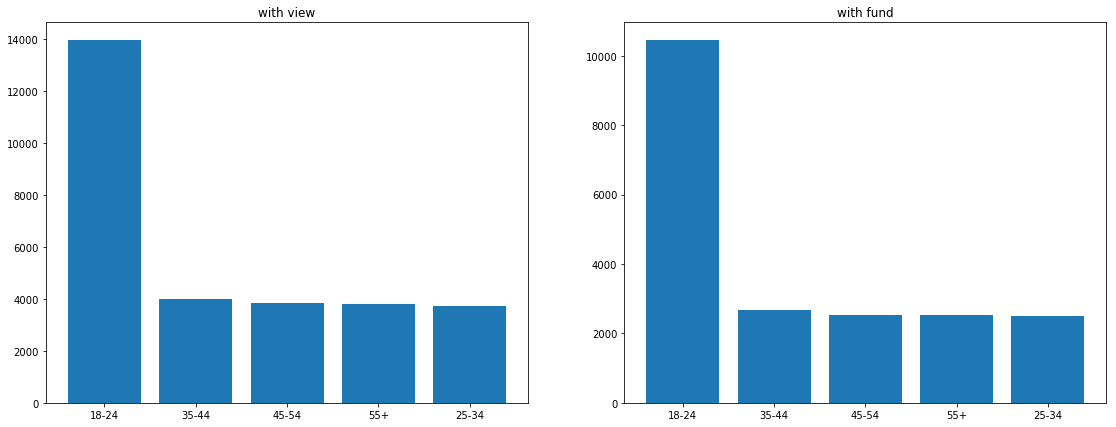

In [158]:
plt.figure(figsize=(15,7))
fig,axes=plt.subplots(nrows=1,ncols=2)
fig.set_figheight(7)
fig.set_figwidth(19)
axes[0].bar(np.arange(5),view_age_count,tick_label=view_age)
axes[0].set_title("with view")
axes[1].bar(np.arange(5),fund_age_count,tick_label=fund_age)
axes[1].set_title("with fund")

plt.show()

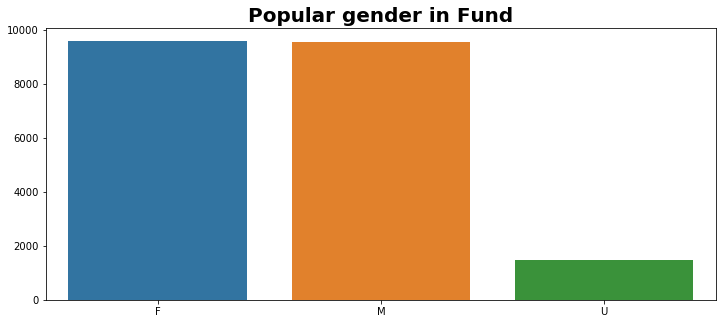

In [299]:
plt.figure(figsize=(12,5))
sns.barplot([0,1,2],fund['gender'].value_counts().values.tolist())
plt.xticks([0,1,2],fund['gender'].value_counts().index.tolist())
plt.title("Popular gender in Fund",fontsize=20,fontweight="semibold")
plt.show()

In [287]:
fund['gender'].value_counts().values.tolist()

[9602, 9571, 1485]

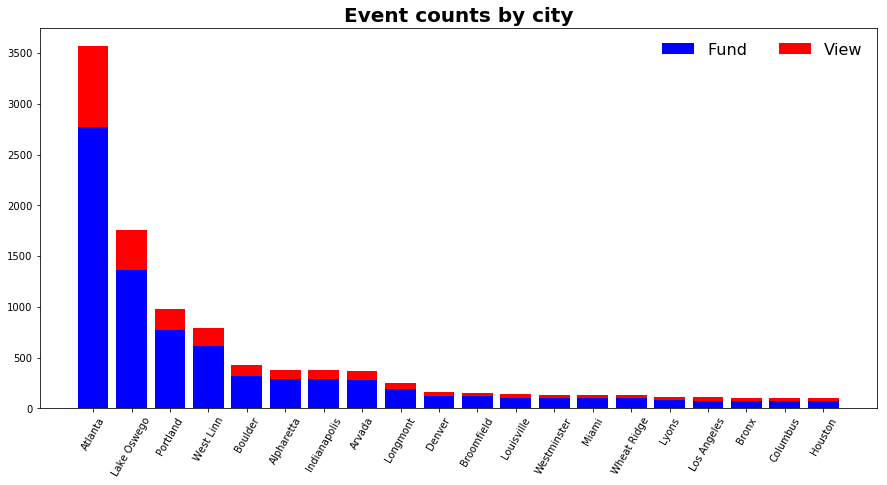

In [300]:
plt.figure(figsize=(15,7))
plt.bar(np.arange(1,21),view['city'].value_counts()[:20].values.tolist(),color='red')
plt.bar(np.arange(1,21),fund['city'].value_counts()[:20].values.tolist(),color='blue')
plt.xticks(np.arange(1,21),view['city'].value_counts()[:20].index.tolist(),rotation=60)
plt.title("Event counts by city",fontsize=20,fontweight="semibold")

topbar = plt.Rectangle((0,0),1,1,fc="red", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='blue',  edgecolor = 'none')
l = plt.legend([bottombar, topbar], ['Fund', 'View'], loc=1, ncol = 2, prop={'size':16})
l.draw_frame(False)

plt.show()

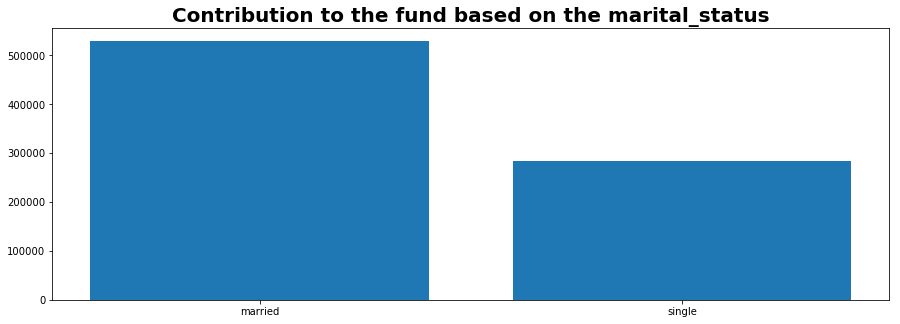

In [401]:
plt.figure(figsize=(15,5))
plt.bar([0,1],fund.groupby(['marital_status'])['amount'].sum().values.tolist())
plt.xticks([0,1],fund.groupby(['marital_status'])['amount'].sum().index.tolist())
plt.title("Contribution to the fund based on the marital_status",fontsize=20,fontweight="semibold")
plt.show()

In [402]:
fund.groupby(['device'])['amount'].sum()

device
android    283545.0
iOS        530525.0
Name: amount, dtype: float64

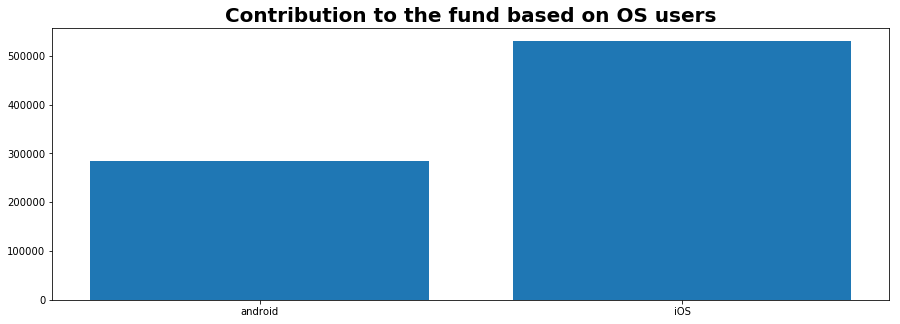

In [404]:
plt.figure(figsize=(15,5))
plt.bar([0,1],fund.groupby(['device'])['amount'].sum().values.tolist())
plt.xticks([0,1],fund.groupby(['device'])['amount'].sum().index.tolist())
plt.title("Contribution to the fund based on OS users",fontsize=20,fontweight="semibold")
plt.show()

In [387]:
fund['marital_status'].value_counts()

married    13483
single      7175
Name: marital_status, dtype: int64

In [225]:
view.groupby(['age'])['device'].value_counts()

age    device 
18-24  iOS        8973
       android    4983
25-34  iOS        2393
       android    1342
35-44  iOS        2567
       android    1433
45-54  iOS        2450
       android    1410
55+    iOS        2445
       android    1346
Name: device, dtype: int64

In [262]:
fund[fund['marital_status']=="married"].device.value_counts()

iOS        9849
android    3634
Name: device, dtype: int64

In [263]:
fund[fund['marital_status']=="single"].device.value_counts()

iOS        3610
android    3565
Name: device, dtype: int64

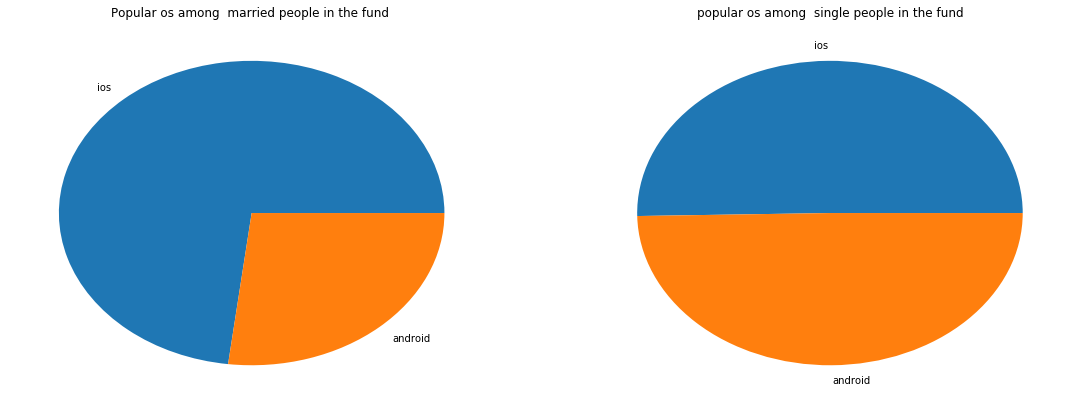

In [325]:
fig,axes=plt.subplots(nrows=1,ncols=2)
fig.set_figheight(7)
fig.set_figwidth(19)
axes[0].pie(fund[fund['marital_status']=="married"].device.value_counts().values.tolist(),labels=["ios","android"])
axes[0].set_title("Popular os among  married people in the fund ")
axes[1].pie(fund[fund['marital_status']=="single"].device.value_counts().values.tolist(),labels=["ios","android"])
axes[1].set_title("popular os among  single people in the fund")
plt.show()

In [304]:
fund.head()

,age,amount,category,device,event_name,gender,marital_status,year,month,day,hour,minute,second,state,longitude,zip_code,latitude,city
11,45-54,61.0,Fashion,iOS,Fund Project,F,married,2014,3,1,0,2,42,IN,-86.254272,46975,41.040988,Rochester
16,18-24,31.0,Sports,android,Fund Project,M,married,2014,3,1,0,3,20,CO,-105.355280,80540,40.189788,Lyons
18,18-24,39.0,Technology,android,Fund Project,M,single,2014,3,1,0,3,31,CO,-105.355280,80540,40.189788,Lyons
25,18-24,36.0,Technology,iOS,Fund Project,M,single,2014,3,1,0,4,4,GA,-84.474050,30009,33.844371,Alpharetta
35,18-24,40.0,Sports,android,Fund Project,M,married,2014,3,1,0,6,35,OR,-122.691388,97034,45.408374,Lake Oswego


# Which age group contributed most to the fund

In [315]:
fund.groupby(['age'])['amount'].sum()

age
18-24    411077.0
25-34     99763.0
35-44    105597.0
45-54     98695.0
55+       98938.0
Name: amount, dtype: float64

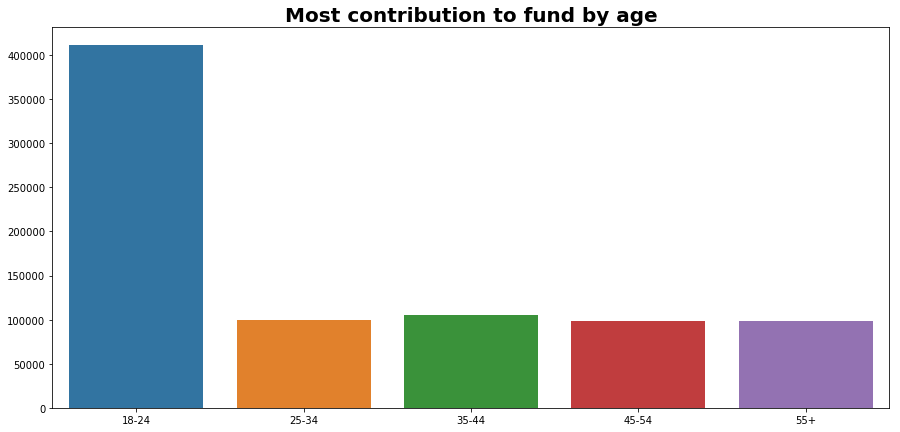

In [324]:
plt.figure(figsize=(15,7))
sns.barplot(np.arange(0,5),fund.groupby(['age'])['amount'].sum().values.tolist())
plt.xticks(np.arange(0,5),fund.groupby(['age'])['amount'].sum().index.tolist())
plt.title("Most contribution to fund by age",fontsize=20,fontweight="semibold")
plt.show()

In [326]:
fund.head()

,age,amount,category,device,event_name,gender,marital_status,day,hour,minute,second,state,longitude,zip_code,latitude,city
11,45-54,61.0,Fashion,iOS,Fund Project,F,married,1,0,2,42,IN,-86.254272,46975,41.040988,Rochester
16,18-24,31.0,Sports,android,Fund Project,M,married,1,0,3,20,CO,-105.355280,80540,40.189788,Lyons
18,18-24,39.0,Technology,android,Fund Project,M,single,1,0,3,31,CO,-105.355280,80540,40.189788,Lyons
25,18-24,36.0,Technology,iOS,Fund Project,M,single,1,0,4,4,GA,-84.474050,30009,33.844371,Alpharetta
35,18-24,40.0,Sports,android,Fund Project,M,married,1,0,6,35,OR,-122.691388,97034,45.408374,Lake Oswego


In [327]:
fund['category'].value_counts()

Sports         4179
Games          4173
Technology     4144
Environment    4089
Fashion        4073
Name: category, dtype: int64

In [341]:
fund.groupby(['device'])['category'].value_counts()

device   category   
android  Sports         1502
         Technology     1469
         Games          1442
         Fashion        1395
         Environment    1391
iOS      Games          2731
         Environment    2698
         Fashion        2678
         Sports         2677
         Technology     2675
Name: category, dtype: int64

In [342]:
fund.groupby(['device'])['category'].value_counts().tolist()

[1502, 1469, 1442, 1395, 1391, 2731, 2698, 2678, 2677, 2675]

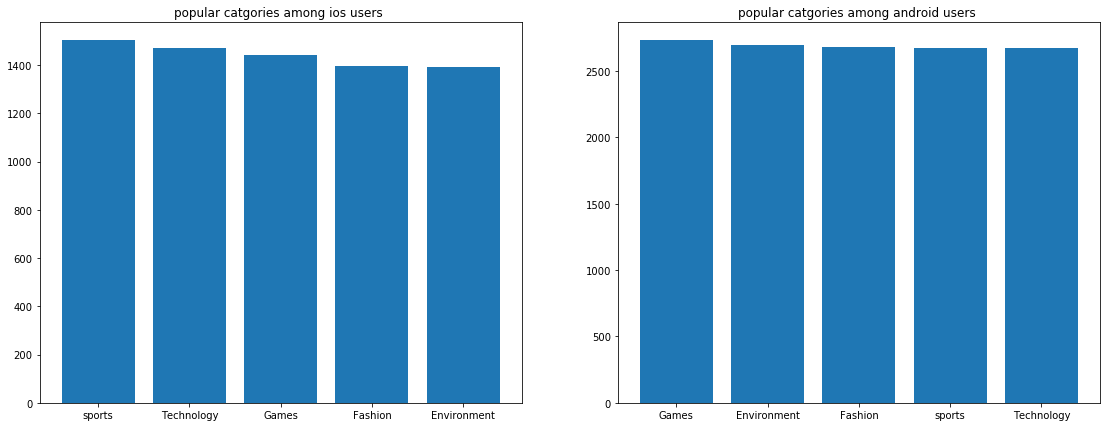

In [385]:
ios_cat=['sports','Technology','Games','Fashion','Environment']
android_cat=['Games','Environment','Fashion','sports','Technology']
#s=['sports','Technology','Games','Fashion','Environment']
#d=['Games','Environment','Fashion','sports','Technology']
plt.figure(figsize=(15,7))
fig,axes=plt.subplots(nrows=1,ncols=2)
fig.set_figheight(7)
fig.set_figwidth(19)
axes[0].bar(np.arange(5),fund.groupby(['device'])['category'].value_counts().tolist()[:5],tick_label=ios_cat)
axes[0].set_title("popular catgories among ios users ")
axes[1].bar(np.arange(5),fund.groupby(['device'])['category'].value_counts().tolist()[5:],tick_label=android_cat)
axes[1].set_title("popular catgories among android users ")

plt.show()